In [1]:
import sys
sys.path.append('../../preprocess_assets/')

In [2]:
# Main libraries 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Our files
from data_shuffling_split import *
from features_extraction import *
from ara_vec_preprocess_configs import *
from ml_modeling import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
strat_train_set = read_file("train/strat_train_set.csv")
strat_train_set.head()

label                                               text
0      1  مع انتشار الامراض ومنها الكورونا اليكم النصيحه...
1      0   1 دراسه بحثيه صادره معهد الدراسات الاستراتيجي...
2      1  بدات في مدينه وهان في الصين انتقلت لبعض المقاط...
3      1           coronarvirus CoronaOutbreak فيروس_كورونا
4      1  الاداره_العامه_للطيران_المدني اجراءات وقاءيه ح...

In [4]:
x_train_text, x_val_text, y_train, y_val = prepare_data(strat_train_set)

The number of instances in the training data after StratifiedShuffleSplit are:  8643
The number of instances in the testing data after StratifiedShuffleSplit are:   177
The number of trainin instances:  8643
The number of validation instances:  177
The number of trainin labels :  8643
The number of validation labels :  177


In [5]:
x_train_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_train_text)

print("Before Tokenization : \n", x_train_text[:3])
print("="*50)
print("After Tokenization : \n", x_train_text_tokenized[:3])
print("="*50)

x_val_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_val_text)

print("Before Tokenization : \n", x_val_text[:3])
print("="*50)
print("After Tokenization : \n", x_val_text_tokenized[:3])

fullgram_x_train_text_tokenized = get_all_ngrams(x_train_text_tokenized)
print("full gram tokenization : \n", fullgram_x_train_text_tokenized[:3])
print("="*50)
fullgram_x_val_text_tokenized = get_all_ngrams(x_val_text_tokenized)
print("full gram tokenization : \n", fullgram_x_val_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['الصين تخفض الاحتياطي الالزامي للبنوك اجل تحفيز الاقتصاد اقتصاد_مصر ', 'عندي مواعيد المستشفي احس اني ميته خوف معقم كمامات رعب', 'شيخنا العزيز لماذا الصين بالذات الكثير شركاتها متهمه بالفساد وعندنا تعمل بمشاريع المجاري وقبل سنتان ولحد قاموا بتفليش الشوارع ولم يكملوا المجاري ولم يعبدوا الشوارع تفليشها لماذا لانستقدم شركات فرنسا او المانيا او اليابان او حتي روسيا مع التقدير']
After Tokenization : 
 [['الصين', 'تخفض', 'الاحتياطي', 'الالزامي', 'للبنوك', 'اجل', 'تحفيز', 'الاقتصاد', 'اقتصاد_مصر'], ['عندي', 'مواعيد', 'المستشفي', 'احس', 'اني', 'ميته', 'خوف', 'معقم', 'كمامات', 'رعب'], ['شيخنا', 'العزيز', 'لماذا', 'الصين', 'بالذات', 'الكثير', 'شركاتها', 'متهمه', 'بالفساد', 'وعندنا', 'تعمل', 'بمشاريع', 'المجاري', 'وقبل', 'سنتان', 'ولحد', 'قاموا', 'بتفليش', 'الشوارع', 'ولم', 'يكملوا', 'المجاري', 'ولم', 'يعبدوا', 'الشوارع', 'تفليشها', 'لماذا', 'لانستقدم', 'شركات', 'فرنسا', 'او', 'المانيا', 'او', 'اليابان', 'او', 'حتي', 'روسيا', 'مع', 'التقدير']]
Before Tokenization : 
 ['صفق

In [6]:
# Get how many words inside each text after tokenization
num_of_words_in_each_text = [len(text) for text in fullgram_x_train_text_tokenized]
max_len = max(num_of_words_in_each_text)
print("The max length is: ", max_len)
num_of_words_in_each_text[:10]

The max length is:  237


[24, 27, 114, 87, 27, 30, 123, 36, 54, 24]

The number of keys before removing are:  63
The number of keys after removing some of them are:  47


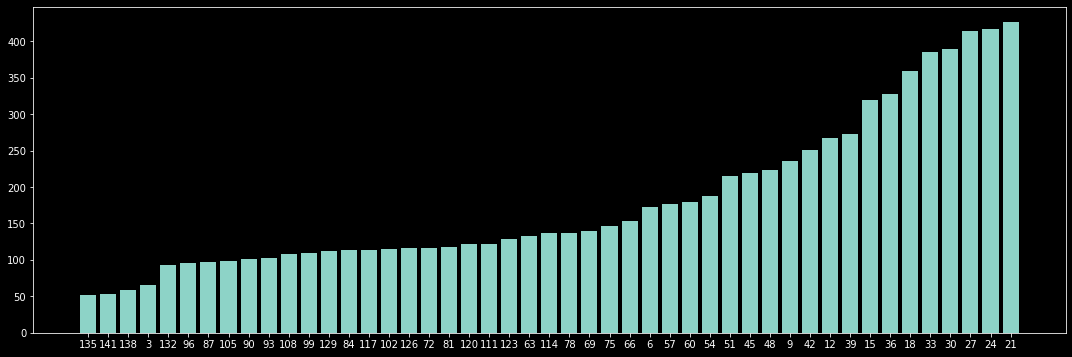

In [8]:
# count how many times these value repeated and sort them
new_dicts = get_keys_that_val_gr_than_num(num_of_words_in_each_text, 50)
keys = list(new_dicts.keys())
values = list(new_dicts.values())
plt.style.use('dark_background')
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.bar(range(len(new_dicts)), values, tick_label=keys)
plt.show()

# Our CBOW Word2Vec Model

In [9]:
our_word2vec_model = load_word2vec_model("../word2vec_models/rezk/cbow/continuous_bow_fullgram_vec_size_300-d_min_count_100")

In [10]:
number_of_features = 300
max_len_str = 237
word2vec_path = "rezk/cbow/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[-0.4805   0.1469   0.515   -0.0917   0.1716  -0.5327  -0.00957 -0.2554
  0.1427  -0.1697   0.1628  -0.1864  -0.423    0.1849  -0.01895  0.2593
  0.0554  -0.202   -0.9077  -0.1611  -0.2866  -0.1271  -0.119    0.0774
  0.00858 -0.03262  0.01156 -0.05792  0.09357 -0.303   -0.1738  -0.2012
 -0.252   -0.10443  0.1705   0.2007  -0.3098   0.0258  -0.2323  -0.282
 -0.514   -0.3896   0.1611  -0.1481   0.0856  -0.01016  1.23     0.2974
  0.3635  -0.679  ]
(177, 237, 300)
(177, 71100)
[ 0.2258    0.0795    0.14     -0.608    -0.06088   0.2169    0.3667
 -0.3281    0.0834   -0.7896    0.261    -0.2103    0.575    -0.3938
 -0.007565 -0.1766   -0.477     0.1844   -0.6147   -0.0781    0.3618
  0.2246    0.1364   -0.1401   -0.0787    0.7515   -0.159    -0.699
  0.302    -0.558     0.3145   -0.0625    0.3845   -0.1544   -0.0661
 -0.6094    0.509    -0.802     0.2556   -0.8833   -0.2952    0.1896
  0.0886    0.3132    0.3474   -0.0825    0.1298    0.3054   -0.2114
 -0.301

In [11]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  4.53500D+02


 This problem is unconstrained.



At iterate   50    f=  1.08354D+02    |proj g|=  1.53723D+00

At iterate  100    f=  1.07876D+02    |proj g|=  6.79747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    108      1     0     0   6.797D-03   1.079D+02
  F =   107.87596599450643     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


===================== Validate Result =====================
F1 score is:  0.847457627118644
It takes to run:  0:01:10.931656
[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -19.202317
nSV = 2841
===================== Validate Result =====================
F1 score is:  0.8248587570621468
It takes to run:  0:00:25.793573


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 12
Objective value = -0.239829
nSV = 7215
[LibLinear].*
optimization finished, #iter = 11
Objective value = -0.330119
nSV = 8142
[LibLinear].*
optimization finished, #iter = 12
Objective value = -0.351216
nSV = 8480
[LibLinear].*
optimization finished, #iter = 12
Objective value = -0.385379
nSV = 8548
[LibLinear].*
optimization finished, #iter = 12
Objective value = -0.410860
nSV = 8620
===================== Validate Result =====================
F1 score is:  0.903954802259887
It takes to run:  0:01:29.496486
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0011           0.0875           28.26s
         2           0.9140           0.0538           25.61s
         3           0.8370          -0.0016           22.55s
         4           0.7927          -0.0120           18.98s
         5           0.7393           0.0001           15.82s
         6           0.8225          -0.0731           12.71s
     

In [12]:
bakr_word2vec_model = load_word2vec_model("../word2vec_models//bakr/cbow/full_grams_cbow_300_twitter.mdl")

In [13]:
word2vec_path = "bakr/cbow/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[-1.135   -2.104    1.518    1.966   -1.1875  -0.8887   0.02058 -0.6045
  0.812    0.503   -0.561    1.524   -0.6035   0.00866 -0.825   -0.9634
 -0.643    0.3687   0.14     2.32    -0.665   -0.2158   0.3616   1.305
  0.144    0.522    0.5557  -2.898    0.1288   1.279   -0.3296   1.474
  0.725   -0.2395  -1.222   -0.2517   0.418   -1.958   -0.1783  -0.779
  0.08136 -1.038   -0.05753 -0.5967   0.1014   1.523   -0.4175  -0.562
 -0.9556  -1.049  ]
(177, 237, 300)
(177, 71100)
[ 0.3616  -1.249    0.3608   1.048    1.127   -1.158   -0.7837  -1.598
  2.188   -0.362   -1.255   -0.8003  -1.919    0.2395   1.579   -0.7744
 -0.2468   1.082    0.7173   1.577    0.3435   1.637    0.3274   1.705
  0.906    0.1032   1.727   -3.434    0.5835   1.754   -0.585    1.02
 -2.506   -0.729   -1.3955   0.1392  -0.6064  -0.523    0.712    0.09863
 -1.098   -1.158   -0.8594  -2.305    1.963   -0.0509   0.5586  -3.125
 -1.472   -1.637  ]
(8643, 71100)
(177, 71100)


In [14]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  9.75435D+02


 This problem is unconstrained.



At iterate   50    f=  6.45157D+01    |proj g|=  1.01609D+00

At iterate  100    f=  5.52343D+01    |proj g|=  2.91494D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    108      1     0     0   2.915D-01   5.523D+01
  F =   55.234258525784597     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


===================== Validate Result =====================
F1 score is:  0.8418079096045198
It takes to run:  0:01:12.594892
[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -13.653681
nSV = 2736
===================== Validate Result =====================
F1 score is:  0.7909604519774012
It takes to run:  0:00:11.257462


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 18
Objective value = -0.154286
nSV = 5842
[LibLinear]...*
optimization finished, #iter = 32
Objective value = -0.221747
nSV = 6722
[LibLinear]...*
optimization finished, #iter = 37
Objective value = -0.269020
nSV = 7067
[LibLinear]....*
optimization finished, #iter = 41
Objective value = -0.306512
nSV = 7370
[LibLinear].....*
optimization finished, #iter = 55
Objective value = -0.318828
nSV = 7685
===================== Validate Result =====================
F1 score is:  0.8418079096045198
It takes to run:  0:01:25.999439
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9626           0.0107           18.98s
         2           1.0401          -0.0041           16.98s
         3           0.9805           0.0238           15.17s
         4           0.8282          -0.0780           12.94s
         5           0.9352          -0.0729           10.78s
         6           0.8526          -0.0728           

In [15]:
muhammed_word2vec_model = load_word2vec_model("../word2vec_models/muhammed/cbow/w2v_CBOW_300_3_400_10.model")

In [16]:
word2vec_path = "muhammed/cbow/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(8643, 237, 300)
(8643, 71100)
[ 0.2268  -0.9756  -0.4565   0.9346   0.4282  -0.9824  -0.4766  -1.237
  1.305   -0.777   -0.2522   0.6216   0.4358   1.75    -0.996   -0.9746
 -0.118    1.038    0.2406   1.468   -0.6333  -0.355    1.129   -0.2583
 -0.1019  -0.02823 -0.2379   2.113    0.874    0.4878   0.07336  0.6147
  1.942    0.2979   1.115   -0.6704  -0.7065  -0.912    0.3728   0.4736
  0.748   -0.632    1.598    0.4553   0.656   -1.322    1.005   -0.376
  0.1926  -0.5146 ]
(177, 237, 300)
(177, 71100)
[-1.089     0.2603   -0.7544   -0.2598    0.8516    0.005634  0.383
 -0.226    -0.183     2.861     0.2874    1.215     0.855     1.563
 -2.145    -0.538     0.5405   -1.551    -0.6133    0.581    -0.0772
 -1.6875    1.449    -0.427     0.6475    0.2944   -0.6445   -0.7124
  1.22      0.0113   -0.121    -0.01251   1.445     0.2073    0.503
 -0.2708    1.02     -1.307     0.686    -1.208     0.034     1.003
  0.6304    2.082     1.436    -2.375    -1.387     0.703    -1.677
 -1.034   ]


In [17]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

 

print("=" * 50)

model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)

#  Gradient Boosting

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       142202     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99087D+03    |proj g|=  8.25380D+02


 This problem is unconstrained.



At iterate   50    f=  1.41857D+02    |proj g|=  6.52195D+00

At iterate  100    f=  1.20063D+02    |proj g|=  1.01073D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    105      1     0     0   1.011D+00   1.201D+02
  F =   120.06313916977288     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
===================== Validate Result =====================
F1 score is:  0.7796610169491526
It takes to run:  0:01:10.200654


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -25.973004
nSV = 2961
===================== Validate Result =====================
F1 score is:  0.751412429378531
It takes to run:  0:00:12.457172


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 18
Objective value = -0.190227
nSV = 6394
[LibLinear]..*
optimization finished, #iter = 24
Objective value = -0.280417
nSV = 7561
[LibLinear]....*
optimization finished, #iter = 45
Objective value = -0.337163
nSV = 7935
[LibLinear]...*
optimization finished, #iter = 39
Objective value = -0.364357
nSV = 8326
[LibLinear]......*
optimization finished, #iter = 62
Objective value = -0.389119
nSV = 8434
===================== Validate Result =====================
F1 score is:  0.7796610169491526
It takes to run:  0:01:30.967479
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9924           0.0282           18.11s
         2           0.9523          -0.0125           17.38s
         3           0.9369          -0.0165           15.07s
         4           0.9819          -0.0440           12.83s
         5           0.8446          -0.0900           10.55s
         6           0.9633          -0.0740           

# Load best model & predict test set

In [18]:
strat_test_set = read_file("test/strat_test_set.csv")
strat_test_set.head()

label                                               text
0      1                 حساء خفافيش الصين ابداع القرف يعني
1      1  اجراءات هكذا استعدت مصر لمواجهه فيروس كورونا م...
2      1            ايش الفايده لابس كمامات ومو لابس قفازات
3      0  الجدير بالذكر ان في الصين بيستخدموا ال في كل ح...
4      0       ولو ترسل صواريخ الصين وقفنا دون برج الفيصليه

In [19]:
X_test_text = list(strat_test_set['text'])
y_test = strat_test_set['label'].values

In [20]:
X_test_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(X_test_text)

print("Before Tokenization : \n", X_test_text[:3])
print("="*50)
print("After Tokenization : \n", X_test_text_tokenized[:3])
print("="*50)

fullgram_X_test_text_tokenized = get_all_ngrams(X_test_text_tokenized)
print("full gram tokenization : \n", fullgram_X_test_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['حساء خفافيش الصين ابداع القرف يعني', 'اجراءات هكذا استعدت مصر لمواجهه فيروس كورونا مرايتي', 'ايش الفايده لابس كمامات ومو لابس قفازات']
After Tokenization : 
 [['حساء', 'خفافيش', 'الصين', 'ابداع', 'القرف', 'يعني'], ['اجراءات', 'هكذا', 'استعدت', 'مصر', 'لمواجهه', 'فيروس', 'كورونا', 'مرايتي'], ['ايش', 'الفايده', 'لابس', 'كمامات', 'ومو', 'لابس', 'قفازات']]
full gram tokenization : 
 [['حساء', 'خفافيش', 'الصين', 'ابداع', 'القرف', 'يعني', 'حساء_خفافيش', 'خفافيش_الصين', 'الصين_ابداع', 'ابداع_القرف', 'القرف_يعني', 'حساء_خفافيش_الصين', 'خفافيش_الصين_ابداع', 'الصين_ابداع_القرف', 'ابداع_القرف_يعني'], ['اجراءات', 'هكذا', 'استعدت', 'مصر', 'لمواجهه', 'فيروس', 'كورونا', 'مرايتي', 'اجراءات_هكذا', 'هكذا_استعدت', 'استعدت_مصر', 'مصر_لمواجهه', 'لمواجهه_فيروس', 'فيروس_كورونا', 'كورونا_مرايتي', 'اجراءات_هكذا_استعدت', 'هكذا_استعدت_مصر', 'استعدت_مصر_لمواجهه', 'مصر_لمواجهه_فيروس', 'لمواجهه_فيروس_كورونا', 'فيروس_كورونا_مرايتي'], ['ايش', 'الفايده', 'لابس', 'كمامات', 'ومو', 'لابس', 'قفاز

In [22]:
rezk_model = pickle_load_model("../ml_models_saved/rezk/cbow/AdaBoostClassifier__f1_0.904_ml.sav"  )
bakr_model = pickle_load_model("../ml_models_saved/bakr/cbow/AdaBoostClassifier__f1_0.842_ml.sav"  )
muhammed_model = pickle_load_model("../ml_models_saved/muhammed/cbow/AdaBoostClassifier__f1_0.78_ml.sav"  )

X_test_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(rezk_model, X_test_embed_matrix, y_test)
print("="*50)

X_test_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(bakr_model, X_test_embed_matrix, y_test)
print("="*50)

X_test_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(muhammed_model, X_test_embed_matrix, y_test)

(180, 237, 300)
(180, 71100)
[ 0.2527   0.522    0.1779   0.4744  -0.2773   0.06058 -0.129   -0.2115
  0.2888   0.6753   0.1991   0.4854   0.887    0.1575   0.04596  0.02391
  0.393    0.4778  -0.2332  -0.2058  -0.5474  -0.7773  -0.11176 -0.1393
 -0.3208  -0.1919  -0.277   -1.303    0.1914  -0.503    0.1576  -0.4834
 -0.1271  -0.799    1.056    0.5728  -0.7295  -0.4622  -0.3062  -0.05975
 -0.651    0.2406   0.12335  0.547    0.3616   0.00967  0.6387   0.6045
  0.07007 -0.457  ]
===================== Validate Result =====================
F1 score is:  0.9
(180, 237, 300)
(180, 71100)
[ 0.1781   0.0907  -0.855    0.3633  -0.117   -0.253   -0.3142   0.0964
  0.9585  -0.1278  -0.10754  0.962    1.264   -1.41    -0.01978 -0.5273
 -0.8696  -0.364    1.239   -1.581   -0.75    -0.6987  -0.3423   0.4714
  0.2732  -0.2334   0.575   -1.28    -0.2057   0.1677  -1.732    0.969
  0.188   -0.746   -0.961   -0.794    0.2544  -0.10864  0.3572  -0.454
 -0.9976  -0.3215  -0.371   -0.6963  -1.173    1.402

0.856

# Qualitative Evaluation

In [23]:
print("The number of words the model learn from your dataset are:", len(list(our_word2vec_model.wv.index_to_key)))
print("The number of words the model learn from your dataset are:", len(list(bakr_word2vec_model.wv.index_to_key)))
print("The number of words the model learn from your dataset are:", len(list(muhammed_word2vec_model.wv.index_to_key)))

The number of words the model learn from your dataset are: 2027042
The number of words the model learn from your dataset are: 1476715
The number of words the model learn from your dataset are: 49555


In [24]:
our_word2vec_model.wv.most_similar('قابس')

[('ورقله', 0.3904670476913452),
 ('عمومي', 0.3743228018283844),
 ('مخزن', 0.3683922290802002),
 ('نابل', 0.36097875237464905),
 ('شاحنات', 0.3510302007198334),
 ('وهران', 0.3498019576072693),
 ('بنزرت', 0.3469192087650299),
 ('سبيطار', 0.34339210391044617),
 ('الحافلات', 0.3423183858394623),
 ('مقود', 0.33368536829948425)]

In [25]:
bakr_word2vec_model.wv.most_similar('قابس')

[('تطاوين', 0.7341261506080627),
 ('صفاقس', 0.7238403558731079),
 ('جندوبه', 0.7116974592208862),
 ('بنزرت', 0.7100087404251099),
 ('المنستير', 0.6773075461387634),
 ('الحسيمه', 0.6545844078063965),
 ('طانطان', 0.6462110280990601),
 ('بنقردان', 0.6412318348884583),
 ('القصرين', 0.6397384405136108),
 ('باتنه', 0.6369710564613342)]

In [26]:
muhammed_word2vec_model.wv.most_similar('قابس')

KeyError: "Key 'قابس' not present in vocabulary"

In [ ]:
our_word2vec_model.wv.most_similar('طنطا')

In [ ]:
bakr_word2vec_model.wv.most_similar('طنطا')

In [ ]:
muhammed_word2vec_model.wv.most_similar('طنطا')

In [ ]:
our_word2vec_model.wv.most_similar('فندق')

In [27]:
bakr_word2vec_model.wv.most_similar('فندق')

[('منتجع', 0.7481030821800232),
 ('بفندق', 0.7235889434814453),
 ('لفندق', 0.7201179265975952),
 ('وفندق', 0.6753846406936646),
 ('مطعم', 0.6692240238189697),
 ('مول', 0.6612789630889893),
 ('الفندق', 0.6314715147018433),
 ('فنادق', 0.6291308999061584),
 ('مجمع', 0.6255536675453186),
 ('هوتيل', 0.6180466413497925)]

In [28]:
muhammed_word2vec_model.wv.most_similar('فندق')

[('بفندق', 0.7621088624000549),
 ('منتجع', 0.6392003893852234),
 ('الفندقيه', 0.5865583419799805),
 ('فندقيه', 0.5777254104614258),
 ('سويس', 0.5689682960510254),
 ('مول', 0.5638153553009033),
 ('بلازا', 0.5522259473800659),
 ('مطعم', 0.5433758497238159),
 ('فنادق', 0.5408634543418884),
 ('برج', 0.5356990098953247)]

In [29]:
our_word2vec_model.wv.most_similar('🤣')

[('😆', 0.8333120942115784),
 ('😁', 0.8321138024330139),
 ('😜', 0.8205730319023132),
 ('😏', 0.819418728351593),
 ('😅', 0.8010570406913757),
 ('😒', 0.7967824339866638),
 ('هه', 0.7967004776000977),
 ('😂', 0.7781848907470703),
 ('😬', 0.7624844312667847),
 ('😀', 0.7618412375450134)]

In [30]:
bakr_word2vec_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [31]:
muhammed_word2vec_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [32]:
our_word2vec_model.wv.most_similar('🇰🇼')

[('🇴🇲', 0.6610525846481323),
 ('العيد_الوطني_الكويتي', 0.6014205813407898),
 ('اليوم_الوطني_الكويتي', 0.5943148732185364),
 ('🇦🇪', 0.5859056711196899),
 ('الكويت', 0.5772003531455994),
 ('🇸🇦', 0.5617915987968445),
 ('🇶🇦', 0.5346092581748962),
 ('عمان', 0.5341886281967163),
 ('🇯🇴', 0.5333636999130249),
 ('الحبيبه', 0.5255107283592224)]

In [33]:
bakr_word2vec_model.wv.most_similar('🇰🇼')

[('لزيارتن', 0.5828799605369568),
 ('🇶🇦', 0.5708760619163513),
 ('وشعبهاا', 0.5684718489646912),
 ('شوفو_شكاتب_عن', 0.5620298385620117),
 ('ومثلتم', 0.5597826838493347),
 ('الكويت_قويه', 0.5401729941368103),
 ('يدعوالمغردين', 0.5397713780403137),
 ('🇧🇭', 0.5372673869132996),
 ('\u200e\u200bبنات', 0.5294809341430664),
 ('\ue42c\ue022\ue022', 0.5247477889060974)]

In [34]:
muhammed_word2vec_model.wv.most_similar('🇰🇼')

KeyError: "Key '🇰🇼' not present in vocabulary"

In [35]:
our_word2vec_model.wv.most_similar('IT')

[('تخصص', 0.5229156017303467),
 ('دبلوم', 0.5104511380195618),
 ('هندسه', 0.5050167441368103),
 ('HR', 0.4961112439632416),
 ('تخصصات', 0.49260127544403076),
 ('Design', 0.4920426309108734),
 ('science', 0.48735666275024414),
 ('english', 0.483235627412796),
 ('تخصصي', 0.4781688153743744),
 ('web', 0.4774109125137329)]

In [36]:
bakr_word2vec_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [37]:
muhammed_word2vec_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [38]:
our_word2vec_model.wv.most_similar('؟')

[('🤔', 0.7987214922904968),
 ('!', 0.7966918349266052),
 ('ايش', 0.6314217448234558),
 ('😳', 0.6253553032875061),
 ('🙄', 0.6185094714164734),
 ('ليش', 0.60459965467453),
 ('هل', 0.5959916114807129),
 ('بالضبط', 0.5893946886062622),
 ('وليش', 0.5871163606643677),
 ('وين', 0.5863702893257141)]

In [39]:
bakr_word2vec_model.wv.most_similar('؟')

[('!', 0.9033966660499573),
 ('يعني', 0.740557074546814),
 ('والا', 0.7289409041404724),
 ('.', 0.7240429520606995),
 ('ولا', 0.721303403377533),
 ('او', 0.7055953145027161),
 ('و', 0.7010874152183533),
 ('لان', 0.6699416041374207),
 ('لو', 0.6614589095115662),
 ('لكن', 0.6578097343444824)]

In [40]:
muhammed_word2vec_model.wv.most_similar('؟')

KeyError: "Key '؟' not present in vocabulary"

In [41]:
our_word2vec_model.wv.most_similar('🌸')

[('🌼', 0.7827603816986084),
 ('🌺', 0.7816051244735718),
 ('🌷', 0.7739440202713013),
 ('🕊', 0.7702279686927795),
 ('🌹', 0.7598779201507568),
 ('🍃', 0.7443662285804749),
 ('🌿', 0.7275475859642029),
 ('⚘', 0.6947581768035889),
 ('🌻', 0.6937013268470764),
 ('💐', 0.6767349243164062)]

In [42]:
bakr_word2vec_model.wv.most_similar('🌸')

[('🍃', 0.8405100107192993),
 ('💕', 0.8223419785499573),
 ('💜', 0.8145712614059448),
 ('✨', 0.8067425489425659),
 ('💗', 0.7939425706863403),
 ('🌿', 0.7814812064170837),
 ('💓', 0.7685064077377319),
 ('🍂', 0.7592586874961853),
 ('🌸🍃', 0.755847156047821),
 ('💞', 0.7555315494537354)]

In [43]:
muhammed_word2vec_model.wv.most_similar('🌸')

KeyError: "Key '🌸' not present in vocabulary"

In [53]:
our_word2vec_model.wv.most_similar('لقاح_كورونا')

[('لقاح_فايزر', 0.6549220085144043),
 ('لقاح_استرازينيكا', 0.6113927364349365),
 ('ضد_كورونا', 0.6070528030395508),
 ('لقاحات_كورونا', 0.5974820256233215),
 ('لقاح_اكسفورد', 0.5744054317474365),
 ('تطعيم_كورونا', 0.5727041959762573),
 ('جائحه_كورونا', 0.57079017162323),
 ('فيروس_كورونا', 0.5688449144363403),
 ('بسبب_كورونا', 0.5619939565658569),
 ('لقاح_#', 0.5581285953521729)]

In [54]:
bakr_word2vec_model.wv.most_similar('لقاح_كورونا')

KeyError: "Key 'لقاح_كورونا' not present in vocabulary"

In [55]:
muhammed_word2vec_model.wv.most_similar('لقاح_كورونا')

KeyError: "Key 'لقاح_كورونا' not present in vocabulary"

In [56]:
our_word2vec_model.wv.most_similar('covid')

[('Covid', 0.6004586815834045),
 ('كوفيد_', 0.5937321782112122),
 ('كوفيد', 0.5223938226699829),
 ('COVID', 0.4459177553653717),
 ('كوفيد-', 0.4404163360595703),
 ('بكوفيد', 0.43128442764282227),
 ('فيروس', 0.4013197422027588),
 ('كورونا', 0.3856709897518158),
 ('19', 0.38514164090156555),
 ('الكوفيد', 0.38418707251548767)]

In [57]:
bakr_word2vec_model.wv.most_similar('covid')

KeyError: "Key 'covid' not present in vocabulary"

In [58]:
muhammed_word2vec_model.wv.most_similar('covid')

KeyError: "Key 'covid' not present in vocabulary"

In [59]:
our_word2vec_model.wv.most_similar('covid_19')

[('covid__', 0.4974498152732849),
 ('Covid_19', 0.40494558215141296),
 ('الزواج_حرام', 0.40035974979400635),
 ('#_لقاح_كورونا', 0.3811916410923004),
 ('هزار_ف_الحاجات', 0.3701528310775757),
 ('يعني_الباك_مضمون', 0.36851733922958374),
 ('ثغرها_الريحان', 0.36113473773002625),
 ('كوفيد-_19', 0.3585827946662903),
 ('حسابشخصي_مسا_النور', 0.3518965542316437),
 ('الفرح_في_الدنيا', 0.3493892252445221)]

In [60]:
bakr_word2vec_model.wv.most_similar('covid_19')

KeyError: "Key 'covid_19' not present in vocabulary"

In [61]:
muhammed_word2vec_model.wv.most_similar('covid_19')

KeyError: "Key 'covid_19' not present in vocabulary"

In [62]:
our_word2vec_model.wv.most_similar('بايدن')

[('ترامب', 0.7947975993156433),
 ('ترمب', 0.7381029725074768),
 ('بايدن،', 0.7302476167678833),
 ('نتنياهو', 0.7187758684158325),
 ('ماكرون', 0.6869528293609619),
 ('اردوغان', 0.678740382194519),
 ('بوتين', 0.6728297472000122),
 ('الديمقراطين', 0.644228458404541),
 ('وبايدن', 0.6290203928947449),
 ('الرئيس', 0.6224396824836731)]

In [63]:
bakr_word2vec_model.wv.most_similar('بايدن')

[('نتانياهو', 0.7114880084991455),
 ('فيلتمان', 0.7097926735877991),
 ('ميدفيديف', 0.708935558795929),
 ('بارزاني', 0.7072679996490479),
 ('كوشنير', 0.7028951048851013),
 ('كرزاي', 0.6996714472770691),
 ('اولمرت', 0.6955073475837708),
 ('لافروف', 0.6889652609825134),
 ('شتاينماير', 0.681617259979248),
 ('الرئيس_الافغاني', 0.6776009798049927)]

In [64]:
muhammed_word2vec_model.wv.most_similar('بايدن')

KeyError: "Key 'بايدن' not present in vocabulary"

In [68]:
our_word2vec_model.wv.most_similar('في_صحيح_البخاري')

[('و_بعد_ذلك', 0.3936161398887634),
 ('رضي_الله_عنه،', 0.3857797086238861),
 ('و_قد_قال', 0.38071349263191223),
 ('؟_الجواب_:', 0.3624115288257599),
 ('الي_يوم_القيامه', 0.3621586561203003),
 ('كما_هو_حال', 0.36155667901039124),
 ('رمز_من_رموز', 0.36141517758369446),
 (')_و_في', 0.3522251844406128),
 ('-رحمه_الله-_:', 0.3520318567752838),
 ('رحمه_الله_(', 0.34769999980926514)]

In [69]:
bakr_word2vec_model.wv.most_similar('في_صحيح_البخاري')

KeyError: "Key 'في_صحيح_البخاري' not present in vocabulary"

In [70]:
muhammed_word2vec_model.wv.most_similar('في_صحيح_البخاري')

KeyError: "Key 'في_صحيح_البخاري' not present in vocabulary"

In [71]:
our_word2vec_model.wv.most_similar('الي_يوم_القيامه')

[('الله_يوم_القيامه', 0.4814794957637787),
 ('و_يوم_القيامه', 0.47193533182144165),
 ('القيامه_._.', 0.4676002860069275),
 ('في_يوم_القيامه', 0.4511881470680237),
 ('عليه_يوم_القيامه', 0.4481530487537384),
 ('لي_يوم_القيامه', 0.44698840379714966),
 ('حتي_يوم_القيامه', 0.4436645805835724),
 ('لنا_يوم_القيامه', 0.434238463640213),
 ('له_يوم_القيامه', 0.4084794223308563),
 ('الامم_يوم_القيامه', 0.3992093801498413)]

In [72]:
bakr_word2vec_model.wv.most_similar('الي_يوم_القيامه')

KeyError: "Key 'الي_يوم_القيامه' not present in vocabulary"

In [73]:
muhammed_word2vec_model.wv.most_similar('الي_يوم_القيامه')

KeyError: "Key 'الي_يوم_القيامه' not present in vocabulary"

In [83]:
our_word2vec_model.wv.most_similar('اليهود_الصهاينه')

[('علي_الصهاينه', 0.49538150429725647),
 ('اليهود_و', 0.49214139580726624),
 ('اليهود_والنصاري', 0.48360851407051086),
 ('ضد_الصهاينه', 0.47528502345085144),
 ('و_الصهاينه', 0.47152358293533325),
 ('من_الصهاينه', 0.46886128187179565),
 ('اليهود_.', 0.4323241114616394),
 ('مع_الصهاينه', 0.41039589047431946),
 ('#_الصهاينه', 0.4075412452220917),
 ('اليهود_؟', 0.3928696811199188)]

In [82]:
bakr_word2vec_model.wv.most_similar('اليهود_الصهاينه')

KeyError: "Key 'اليهود_الصهاينه' not present in vocabulary"

In [84]:
muhammed_word2vec_model.wv.most_similar('اليهود_الصهاينه')

KeyError: "Key 'اليهود_الصهاينه' not present in vocabulary"

In [85]:
our_word2vec_model.wv.most_similar('بن_خلدون')

[('بن_عبدالرحمن', 0.3823440372943878),
 ('بن_مسلم', 0.37824636697769165),
 ('بن_تميم', 0.3745449483394623),
 ('بن_كيران', 0.3713802993297577),
 ('بن_سالم', 0.3708139657974243),
 ('بن_عاشور', 0.36562681198120117),
 ('بن_حسن', 0.3619540333747864),
 ('بن_سيف', 0.35794371366500854),
 ('بن_جابر', 0.35352015495300293),
 ('بن_دغيثر', 0.348258376121521)]

In [86]:
bakr_word2vec_model.wv.most_similar('بن_خلدون')

KeyError: "Key 'بن_خلدون' not present in vocabulary"

In [87]:
muhammed_word2vec_model.wv.most_similar('بن_خلدون')

KeyError: "Key 'بن_خلدون' not present in vocabulary"

In [98]:
from word2vec_results import *

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.651945
[t-SNE] KL divergence after 100 iterations with early exaggeration: 31.322405
[t-SNE] KL divergence after 150 iterations: 0.530759
The shape of our word_features is: (19, 2)


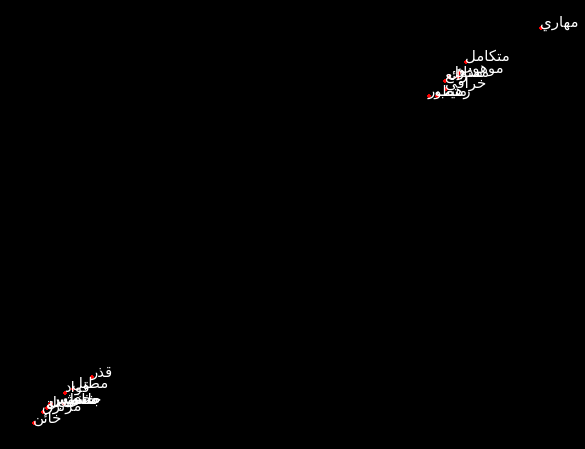

In [107]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

In [108]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(muhammed_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'خائن' not present"

In [109]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(bakr_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 9.311430
[t-SNE] KL divergence after 100 iterations with early exaggeration: 31.294209
[t-SNE] KL divergence after 150 iterations: 0.522330
The shape of our word_features is: (19, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.000s...
[t-SNE] Computed neighbors for 65 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 2.998677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.409809
[t-SNE] KL divergence after 1400 iterations: 0.245460
The shape of our word_features is: (65, 2)


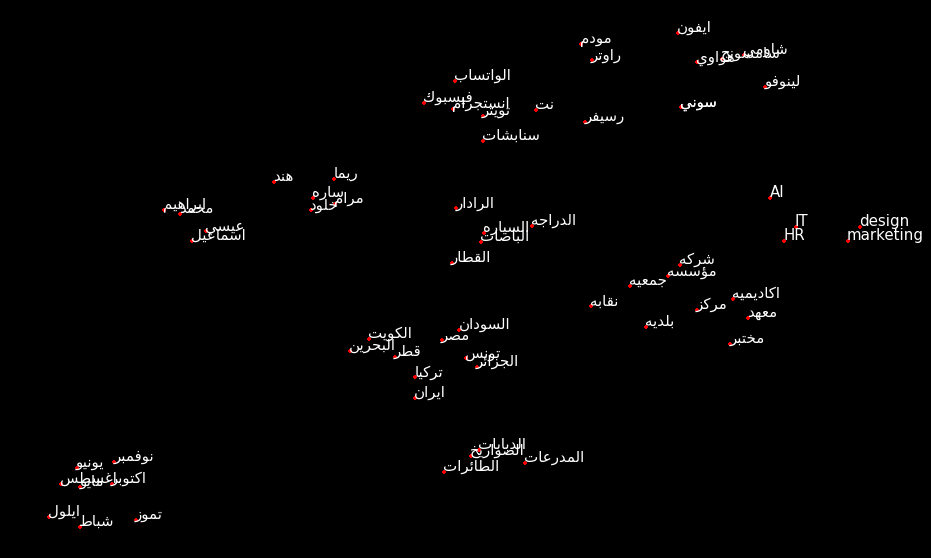

In [110]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

In [111]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(bakr_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'IT' not present"

In [112]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(muhammed_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'IT' not present"